# Introduction 

In this article we are going to discuss our work on predicting House Prices. This is a classic regression problem in which we aim to predict the selling price of a house given its attributes. The motivation in doing such analysis is to provide real estate firms accurate information about expected values of properties. After creating the six models, we conduct an evaluation of each model by comparing its accuracy. This work is organized in the following way: 

1. Methodology
1. Understanding and cleaning the data
1. Linear Regression
1. Random Forests  
1. Suport Vector Machine
1. Gradient Boosting
1. Neural Network
1. Bagging

 


# Methodology


As we are dealing with a regression problem, an appropriate metric is the Root Mean Squared Error or RMSE. The methodology we followed is:

* Each method trained using 5-fold cross-validation.
* Final RMSE,R2 is calculated based on the average results of all training steps.   

Using cross-validation is a common way to assess the predictive performance of the models and to judge how they perform outside the sample (and assess their generalization strength).  


# Understanding and cleaning the data
Much of the work in making a good model is contingent on a good feature preparation process. This phase encompasses tasks such as: cleaning, feature mapping, feature selection, and feature scaling. In this section we describe the steps we did to get a better understanding of the data and to make it more appropriate for modeling analysis.


## The data set

The house prices [data set](https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data) 
has 8 features and the objective is to predict SalePrice. 

In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
from scipy.stats import norm
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline
    
data_train = pd.read_csv("Bengaluru_House_Data.csv",na_values=['?',''],delimiter=',',delim_whitespace=False) # reading data from files


print(data_train.shape)

#print(data_test.shape)

(13320, 9)


## Exploring the dataset

Understanding the data is an important part of our project. The more we understand the data the more we will have the ability to accuratley select and manupilate the features to get the best possible results. In this section we explore possible correlations between the dependent and the independent variables (Figure 1). Linear regression models are sensitive to non-linearity, outliers and colinearity, so we are going also to check these potential problems. 

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Missing values

Maybe the most common problem in real datasets is the missing values. Sometimes, instead of a blank space, a wildcard is used like '?' or 'NA'. In this project, in addition to the missing values we also have some 'NAs' used to denote the absence of features. To solve this issue, whenever appropriate we replace 'NA' by the value 'No'.


In [3]:
data_train.isnull().any()

area_type       False
availability    False
location         True
size             True
society          True
total_sqft      False
bath             True
balcony          True
price           False
dtype: bool

In [4]:
data_train = data_train.dropna(subset = ['size','bath','balcony','location'])

In [5]:
data_train = data_train.fillna({'society': 'None'})

In [6]:
data_train.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
data_train.shape

(12710, 9)

In [8]:
object_data_train=data_train.select_dtypes(include =['object'])
for i in object_data_train:
    print(i,data_train[i].unique(),"\t",len(data_train[i].unique()),"\n")

area_type ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] 	 4 

availability ['19-Dec' 'Ready To Move' '18-Feb' '18-Nov' '18-May' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '18-Apr' '20-Aug' '19-Mar' '17-Sep'
 '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan' '18-Aug' '19-Jan'
 '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep' '17-May' '17-Jun'
 '18-Oct' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun' '22-Jun'
 '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb' '21-Oct'
 '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct' '21-Jul' '21-Nov' '21-Mar'
 '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug' '14-Nov' '19-Nov' '16-Jul'
 '15-Jun' '20-Nov' '20-Jul' '16-Sep' '20-Feb' '15-Dec' '16-Oct' '22-Nov'
 '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan' '17-Feb' '14-Jul'] 	 78 

location ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout'] 	 1265 

si

In [9]:
data_train.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [10]:
def change_to_float(area_size):
    if isinstance(area_size, str):
        area_size = area_size.split('Sq.')[0]
        area_size = area_size.split('Perch')[0]
        area_size = area_size.split('Acres')[0]
        area_size = area_size.split('Guntha')[0]
        area_size = area_size.split('Grounds')[0]
        area_size = area_size.split('Cents')[0]
        area_size = area_size.split('-')
        area_size = list(map(float,area_size))
        area_size = sum(area_size)  / len(area_size)
    return area_size


In [11]:
data_train['total_sqft'] = data_train['total_sqft'].apply(lambda x : change_to_float(x))

In [12]:
data_train['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

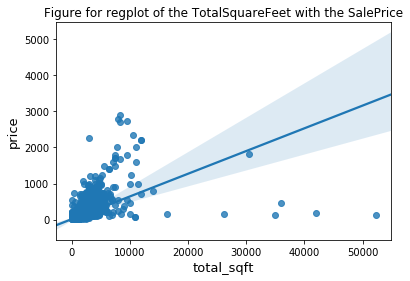

In [13]:
ax = sns.regplot(x=data_train['total_sqft'], y=data_train['price'])
plt.ylabel('price', fontsize= 13)
plt.xlabel('total_sqft', fontsize= 13)
plt.title('Figure for regplot of the TotalSquareFeet with the SalePrice', fontsize= 12);
plt.show()

In [14]:
g_out = data_train.sort_values(by="total_sqft", ascending = False).head(2)
g_out

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1894,Plot Area,Ready To Move,Nelamangala,3 Bedroom,None,52272.0,2.0,1.0,140.0
5393,Super built-up Area,Ready To Move,Doddabommasandra,9 BHK,None,42000.0,8.0,3.0,175.0


In [15]:
data_train.drop([1894,5393,5469,674], inplace = True)


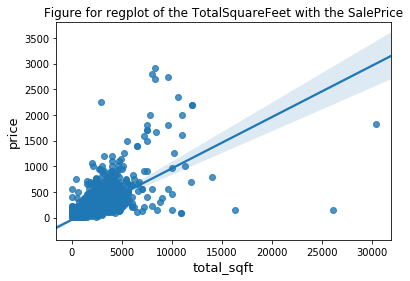

In [16]:
ax = sns.regplot(x=data_train['total_sqft'], y=data_train['price'])
plt.ylabel('price', fontsize= 13)
plt.xlabel('total_sqft', fontsize= 13)
plt.title('Figure for regplot of the TotalSquareFeet with the SalePrice', fontsize= 12);
plt.show()

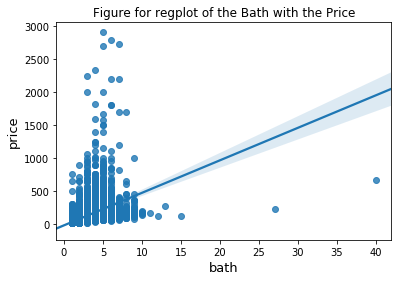

In [17]:
ax = sns.regplot(x=data_train['bath'], y=data_train['price'])
plt.ylabel('price', fontsize= 13)
plt.xlabel('bath', fontsize= 13)
plt.title('Figure for regplot of the Bath with the Price', fontsize= 12);
plt.show()

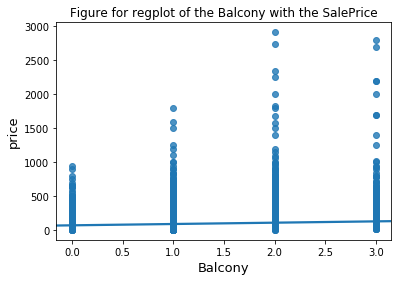

In [18]:
ax = sns.regplot(x=data_train['balcony'], y=data_train['price'])
plt.ylabel('price', fontsize= 13)

plt.xlabel('Balcony', fontsize= 13)
plt.title('Figure for regplot of the Balcony with the SalePrice', fontsize= 12);
plt.show()

In [19]:
print(data_train['size'].unique())
len(data_train['size'].unique())

['2 BHK' '4 Bedroom' '3 BHK' '3 Bedroom' '1 BHK' '1 RK' '4 BHK'
 '1 Bedroom' '2 Bedroom' '6 Bedroom' '8 Bedroom' '7 Bedroom' '5 BHK'
 '7 BHK' '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK'
 '11 Bedroom' '43 Bedroom' '14 BHK' '8 BHK' '12 Bedroom' '10 Bedroom'
 '13 BHK']


27

In [20]:
data_train['size'] = data_train['size'].apply(lambda x: x.split(' ')[0])

In [21]:
print(data_train['size'].unique())
len(data_train['size'].unique())

['2' '4' '3' '1' '6' '8' '7' '5' '11' '9' '27' '43' '14' '12' '10' '13']


16

In [22]:
data_train['society'] = data_train['society'].factorize()[0]+1
data_train['location'] = data_train['location'].factorize()[0]+1

In [23]:
data_train['society'].unique()

array([   1,    2,    3, ..., 2590, 2591, 2592], dtype=int64)

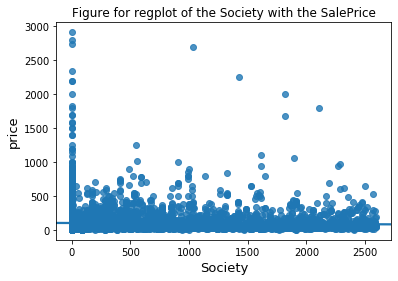

In [24]:
ax = sns.regplot(x=data_train['society'], y=data_train['price'])
plt.ylabel('price', fontsize= 13)

plt.xlabel('Society', fontsize= 13)
plt.title('Figure for regplot of the Society with the SalePrice', fontsize= 12);
plt.show()

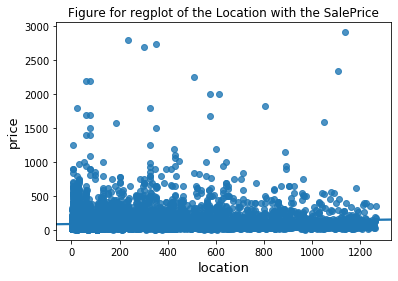

In [25]:
ax = sns.regplot(x=data_train['location'], y=data_train['price'])
plt.ylabel('price', fontsize= 13)

plt.xlabel('location', fontsize= 13)
plt.title('Figure for regplot of the Location with the SalePrice', fontsize= 12);
plt.show()

In [26]:
x_train_data = data_train[['size', 'total_sqft', 'bath', 'balcony']]
y_train_data = data_train['price']

Index(['size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')


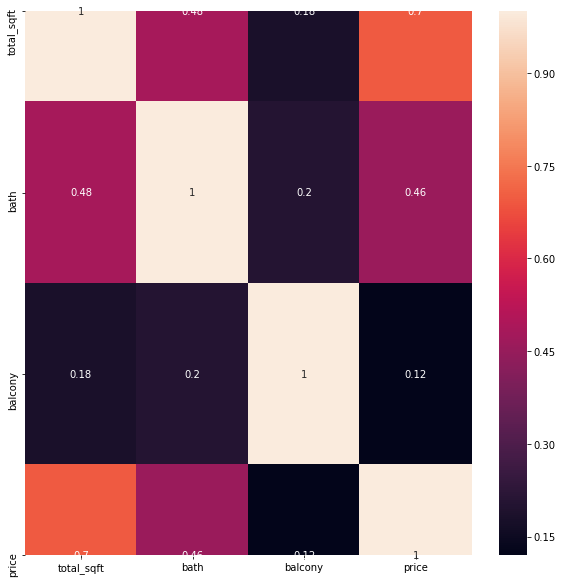

In [27]:
numerical_data = x_train_data.copy()
numerical_data['price'] = y_train_data
print(numerical_data.columns)
corr_matrix = numerical_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)
plt.show()
        

We can notice that some variables are strongly correlated with SalePrice. Specifically, these six features : OverallQual, GrlivArea, TotalBsmtSF, 1stFLrSF, GarageCars, and GrageArea. Moreover, some variables are strongly correlated with each other which means that we might have a multicollinearity. Subsequently, we need to take them into consideration when selecting and preparing the features to use in our modelling. For example there is a strong correlation between Yearbuilt and GarageYrBlt which means that most Garages are built in the same time with the construction of the houses.Therefeore,we can consider that Yearbuilt and GarageYrBlt as the same variable.
The correlation matrix shows only the value of the correlation but it doesn't reveal the nature of the correaltion. On the other hand scatter or some other charts can show the nature of the correlation whether it is linear or has another shape.

In [28]:
RMSE =  {
    'LinearRegression':[0.0],
    'RandomForest':[0.0],
    'SVM':[0.0],
    'GradientBoosting':[0.0],
    'NeuralNetwork':[0.0],
    'Bagging':[0.0],
}

R2 = {
    'LinearRegression':[0.0],
    'RandomForest':[0.0],
    'SVM':[0.0],
    'GradientBoosting':[0.0],
    'NeuralNetwork':[0.0],
    'Bagging':[0.0],   
}

## Linear Regression

In this section we are going to experiment with a set of regression methods in which the target value is expected to have a linear relationship with the input variables. 

###  Ordinary Least Squares

Least Square Error is a well known mathematical measure of the performance of a linear regression model. LSE works by changing the coefficients of the model in a way that minimize the sum of squares between the true values and the predicted values. It solves a problem of the form:   $\underset{w}{min\,} {|| X w - y||_2}^2$ 
and can be solved analyticaly by the equation

$$\hat\beta=(X^TX)^{-1}X^Ty$$

Where X is a matrix of the independents features, y is the actual response and $\hat\beta$ the estimated weights w. 

In [29]:
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn import preprocessing


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


print("Linear Regression \n")

x_train = x_train_data.copy()
y_train = y_train_data.copy()

#Cross validation
classifierLinearRegression = LinearRegression(fit_intercept=True, normalize=False,
                                              copy_X=True, n_jobs=1)
kf = KFold(5, random_state=0, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(x_train)
    x_test_fold = scaler.transform(x_train)

    y_train_fold = y_train
    y_test_fold = y_train
    
    classifierLinearRegression = classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
r2 = metrics.r2_score(cv_y,cv_pred)
print("\n R2 error: {}".format(r2))

RMSE['LinearRegression'] = score
R2['LinearRegression'] = r2



Linear Regression 


 Average RMSE: 92.73535985828345

 R2 error: 0.5045195049608997


## Random Forest

Random Forest is one of the most versatile and precise classifier. It does not need the data being scaled and can deal with any number of features. In order to test the random forest algorithm a little further than the others, we decided to train it using different train sets. First, with a data set containing all the features and no scaling. Second, in the reduced train set with scaled features. 

As we can see in the results bellow, it did well in both cases. This test was also interesting to validate our set of selected features. Seems they are really good options once the performance using the the full set is not significatively better than using the restricted set. 

After some experimentation, the configuration we chose was: the number of trees is 500 as any greater value did not enhance the accuracy, MSE as the function to measure the quality of a split, max_depth with None which means the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples, max_features = auto to consider all the features when looking for the best split and bootstrap = True for replacement as it gave better results during the tests. All the others parameters were maintained in their default values.   

In [31]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


print("RandomForest \n")

x_train = x_train_data.copy()
y_train = y_train_data.copy()

#Cross validation
classifierRandomForest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                max_depth=None, min_samples_split=2, min_samples_leaf=1,
                min_weight_fraction_leaf=0.0, max_features='auto')
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(x_train)
    x_test_fold = scaler.transform(x_train)

    y_train_fold = y_train
    y_test_fold = y_train
    
    classifierRandomForest = classifierRandomForest.fit(x_train_fold, y_train_fold)
    pred = classifierRandomForest.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score)) 
r2 = metrics.r2_score(cv_y,cv_pred)
print("\n R2 error: {}".format(r2))

RMSE['RandomForest'] = score
R2['RandomForest'] = r2

RandomForest 


 Average RMSE: 44.4705542783675

 R2 error: 0.886058764410149


## Support Vector Machine

SVM is a large margin classifier. The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error. Whereas, models with small margins are more
prone to overfitting. We can control the width of the margin using the regularization parameter C. Lower values of C give smaller margins and vice versa. 

We have used the linear kernel as it gave far the best result when comparing to rbf or sigmoid. It is a sign that a linear fit is well adjusted to the true data and also can explain that no regularization was necessary. The best value for C was 1. We kept the other parameters in their default values.

In [33]:
from sklearn.svm import SVR


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split

print("SVM\n")

x_train = x_train_data.copy()
y_train = y_train_data.copy()

#Cross validation
classifierSVM = SVR(kernel = 'linear', gamma='auto', coef0=0.0, tol=0.001)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(x_train)
    x_test_fold = scaler.transform(x_train)

    y_train_fold = y_train
    y_test_fold = y_train
    
    classifierSVM = classifierSVM.fit(x_train_fold, y_train_fold)
    pred = classifierSVM.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
r2 = metrics.r2_score(cv_y,cv_pred)
print("\n R2 error: {}".format(r2))

RMSE['SVM'] = score
R2['SVM'] = r2

SVM


 Average RMSE: 96.94640931259161

 R2 error: 0.45849895830657605


## Gradient Boosting
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

![title](GB.png)

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


print("Gradient Boosting \n")

x_train = x_train_data.copy()
y_train = y_train_data.copy()

#Cross validation
classifierGradientBoost = GradientBoostingRegressor(n_estimators=500)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(x_train)
    x_test_fold = scaler.transform(x_train)

    y_train_fold = y_train
    y_test_fold = y_train
    
    classifierGradientBoost = classifierGradientBoost.fit(x_train_fold, y_train_fold)
    pred = classifierGradientBoost.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score)) 
r2 = metrics.r2_score(cv_y,cv_pred)
print("\n R2 error: {}".format(r2))

RMSE['GradientBoosting'] = score
R2['GradientBoosting'] = r2

Gradient Boosting 


 Average RMSE: 57.4996010228436

 R2 error: 0.8095129298151503


## Multilayer Perceptron

Multi-layer Perceptron (MLP) is a supervised learning algorithm. Given a set of features X = {x_1, x_2, ..., x_m} and a target y, it can learn a non-linear function for either classification or regression. 

The class we are using in our work is the MLPRegressor which implements a multi-layer perceptron that trains using backpropagation with no activation function in the output layer (uses the identity function as activation function). Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

A one hidden layer MLP has a function in the form:$$f : R^D -> R^L$$ where D is the size of input vector x, and L is the size of the output vector f(x). 

We think this model the most difficult to find a good adjustment of complexity. We have tested some configurations and the best set of parameters was: learning rate of 0.001, a ReLu activation function for the hidden layers as this can speed up the learning process, a small value for the regularization parameter alpha of 0.0001 which means an agressive regularization and a net of three hidden layers with 80, 50 and 20 neurons respectively. Even so, it was not enough to get comparable results with the other models. 

In [ ]:
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


print("Neural Network\n")

x_train = x_train_data.copy()
y_train = y_train_data.copy()

#Cross validation
classifierMLP= MLPRegressor(hidden_layer_sizes=(100,50,20),random_state = 1)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(x_train)
    x_test_fold = scaler.transform(x_train)

    y_train_fold = y_train
    y_test_fold = y_train
    
    classifierMLP = classifierMLP.fit(x_train_fold, y_train_fold)
    pred = classifierMLP.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score)) 
r2 = metrics.r2_score(cv_y,cv_pred)
print("\n R2 error: {}".format(r2))

RMSE['NeuralNetwork'] = score
R2['NeuralNetwork'] = r2

Neural Network



## Bagging

Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

![title](BG.png)

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


print("Bagging\n")

x_train = x_train_data.copy()
y_train = y_train_data.copy()

#Cross validation
classifierBagging= BaggingRegressor(random_state = 1)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(x_train)
    x_test_fold = scaler.transform(x_train)

    y_train_fold = y_train
    y_test_fold = y_train
    
    classifierBagging = classifierBagging.fit(x_train_fold, y_train_fold)
    pred = classifierBagging.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score)) 
r2 = metrics.r2_score(cv_y,cv_pred)
print("\n R2 error: {}".format(r2))

RMSE['Bagging'] = score
R2['Bagging'] = r2

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Comparing RMSE scores of each algorithm')
plt.bar(range(len(RMSE)), list(RMSE.values()), align='center')
plt.xticks(range(len(RMSE)), list(RMSE.keys()))

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Comparing R2 scores of each algorithm')
plt.bar(range(len(R2)), list(R2.values()), align='center')
plt.xticks(range(len(R2)), list(R2.keys()))
